#TASK1
a) you create a 3 layer neural network versus what colab does (at most 2 layer)

b) you must use tensorflow einsum instead of matrix multiply you see in colab.

 Use 3 variables based non linear equation (the example i gave in class goes to  2 variables. Generate synthetic data using the equation you used and plot using 4d plot

Epoch 1/100
25/25 [==============================] - 5s 68ms/step - loss: 1455.3306 - val_loss: 1532.3058
Epoch 2/100
25/25 [==============================] - 1s 41ms/step - loss: 1414.8433 - val_loss: 1494.0908
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 1375.0507 - val_loss: 1453.6488
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 1329.2606 - val_loss: 1407.5646
Epoch 5/100
25/25 [==============================] - 1s 23ms/step - loss: 1275.3232 - val_loss: 1344.5000
Epoch 6/100
25/25 [==============================] - 0s 19ms/step - loss: 1203.9453 - val_loss: 1267.4325
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 1119.9839 - val_loss: 1177.0972
Epoch 8/100
25/25 [==============================] - 0s 13ms/step - loss: 1025.9462 - val_loss: 1076.2393
Epoch 9/100
25/25 [==============================] - 0s 14ms/step - loss: 922.5681 - val_loss: 965.4986
Epoch 10/100
25/25 [============================

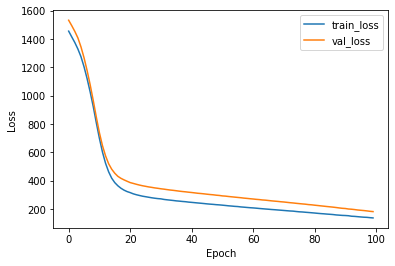

7/7 [==============================] - 0s 2ms/step


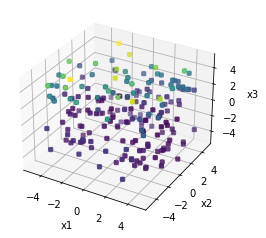

In [1]:
import numpy as np
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate synthetic data
n = 1000
x = np.random.uniform(-5, 5, size=(n, 3))
y = np.sin(x[:, 0]) + x[:, 1]**2 + np.exp(x[:, 2])

# Split data into train and test sets
x_train, x_test = x[:800], x[800:]
y_train, y_test = y[:800], y[800:]

# Build the neural network
inputs = tf.keras.Input(shape=(3,))
hidden1 = tf.keras.layers.Dense(10, activation='relu')(inputs)
hidden2 = tf.keras.layers.Dense(10, activation='relu')(hidden1)
outputs = tf.keras.layers.Dense(1)(hidden2)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = model.predict(x_test)

# Plot the predictions against the true values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_test)
ax.scatter(x_test[:, 0], x_test[:, 1], x_test[:, 2], c=y_pred, marker='x')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()
